In [1]:
import pandas as pd
import pydot
from IPython.display import SVG

#### Load the example dataset

In [2]:
data_dir = "https://raw.githubusercontent.com/bd2kccd/py-causal/master/data/sim_discrete_data_20vars_100cases.txt"
df = pd.read_table(data_dir, sep="\t")

#### Start Java VM

In [3]:
from pycausal.pycausal import pycausal as pc
pc = pc()
pc.start_vm()

#### Load causal algorithms from the py-causal library and Run BayesEst Discrete

In [4]:
from pycausal import search as s
bayesEst = s.bayesEst(df, depth = -1, alpha = 0.05, verbose = True)

#### BayesEst Discrete's Result's Nodes

In [5]:
bayesEst.getNodes()

[u'X0',
 u'X1',
 u'X2',
 u'X3',
 u'X4',
 u'X5',
 u'X6',
 u'X7',
 u'X8',
 u'X9',
 u'X10',
 u'X11',
 u'X12',
 u'X13',
 u'X14',
 u'X15',
 u'X16',
 u'X17',
 u'X18',
 u'X19']

#### BayesEst Discrete's Result's Edges

In [6]:
bayesEst.getEdges()

[u'X18 --> X14',
 u'X10 --> X4',
 u'X15 --> X12',
 u'X3 --> X7',
 u'X17 --> X19',
 u'X9 --> X3',
 u'X13 --> X6',
 u'X13 --> X7',
 u'X17 --> X10',
 u'X6 --> X7',
 u'X11 --> X4',
 u'X14 --> X11',
 u'X8 --> X4',
 u'X15 --> X19']

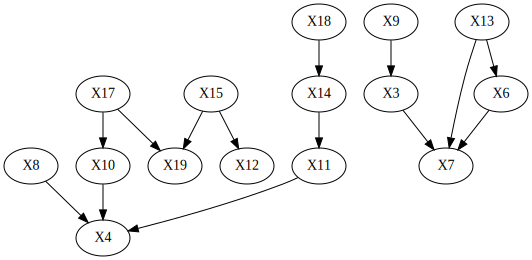

In [7]:
dot = bayesEst.getDot()
svg_str = dot.create_svg(prog='dot')
SVG(svg_str)

In [8]:
bayesEst.getDag()

Instance of edu.cmu.tetrad.graph.Dag: Graph Nodes:
X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19

Graph Edges:
1. X10 --> X4
2. X11 --> X4
3. X13 --> X6
4. X13 --> X7
5. X14 --> X11
6. X15 --> X12
7. X15 --> X19
8. X17 --> X10
9. X17 --> X19
10. X18 --> X14
11. X3 --> X7
12. X6 --> X7
13. X8 --> X4
14. X9 --> X3

In [9]:
bayesEst.getBayesPm()

Instance of edu.cmu.tetrad.bayes.BayesPm: 
X9: 0, 1, 2
X15: 0, 1, 2
X10: 0, 1, 2
X11: 0, 1, 2
X2: 0, 1, 2
X3: 0, 1, 2
X5: 0, 1, 2
X4: 0, 1, 2
X6: 0, 1, 2
X1: 0, 1, 2
X0: 0, 1, 2
X7: 0, 1, 2
X8: 0, 1, 2
X18: 0, 1, 2
X17: 0, 1, 2
X14: 0, 1, 2
X19: 0, 1, 2
X12: 0, 1, 2
X13: 0, 1, 2
X16: 0, 1, 2

In [10]:
im = bayesEst.getBayesIm()
im = im.toString()
im

u'\n\nNode: X0\n\n0.0900\t0.1700\t0.7400\t\n\nNode: X1\n\n0.9400\t0.0500\t0.0100\t\n\nNode: X2\n\n0.7800\t0.0900\t0.1300\t\n\nNode: X3\n\nX9\t\n0\t0.0000\t0.3077\t0.6923\t\n1\t0.1111\t0.8148\t0.0741\t\n2\t0.8235\t0.1176\t0.0588\t\n\nNode: X4\n\nX8\tX10\tX11\t\n0\t0\t0\t\ufffd\t\ufffd\t\ufffd\t\n0\t0\t1\t\ufffd\t\ufffd\t\ufffd\t\n0\t0\t2\t\ufffd\t\ufffd\t\ufffd\t\n0\t1\t0\t\ufffd\t\ufffd\t\ufffd\t\n0\t1\t1\t\ufffd\t\ufffd\t\ufffd\t\n0\t1\t2\t\ufffd\t\ufffd\t\ufffd\t\n0\t2\t0\t\ufffd\t\ufffd\t\ufffd\t\n0\t2\t1\t\ufffd\t\ufffd\t\ufffd\t\n0\t2\t2\t0.0000\t1.0000\t0.0000\t\n1\t0\t0\t1.0000\t0.0000\t0.0000\t\n1\t0\t1\t0.3333\t0.3333\t0.3333\t\n1\t0\t2\t1.0000\t0.0000\t0.0000\t\n1\t1\t0\t\ufffd\t\ufffd\t\ufffd\t\n1\t1\t1\t0.0000\t0.0000\t1.0000\t\n1\t1\t2\t0.2500\t0.2500\t0.5000\t\n1\t2\t0\t1.0000\t0.0000\t0.0000\t\n1\t2\t1\t1.0000\t0.0000\t0.0000\t\n1\t2\t2\t1.0000\t0.0000\t0.0000\t\n2\t0\t0\t\ufffd\t\ufffd\t\ufffd\t\n2\t0\t1\t\ufffd\t\ufffd\t\ufffd\t\n2\t0\t2\t0.8000\t0.2000\t0.0000\t\n2\t1

#### Stop Java VM

In [11]:
pc.stop_vm()